# Biodiversity Project
### Imports

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and inspecting the data in the two csv files

In [94]:
observation_df = pd.read_csv('observations.csv')
species_df = pd.read_csv('species_info.csv')
print(observation_df.info())
print(species_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


### Taking a closer look at the first df

In [95]:
# head
print("---Head---")
print(observation_df.head())
# looking for null values
print("---Null Values---")
print(observation_df.isnull().sum()) #no null values
# looking at the summary
print("---Summary---")
observation_df.describe(include='all')


---Head---
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
---Null Values---
scientific_name    0
park_name          0
observations       0
dtype: int64
---Summary---


,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


### Taking a closer look at the second df

In [96]:
# head
print("---Head---")
print(species_df.head())
# looking for null values
print("---Null Values---")
print(species_df.isnull().sum())
# looking at the summary
print("---Summary---")
species_df.describe(include='all')

---Head---
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
---Null Values---
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64
---Summary---


,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


## Observations
### There are null values under conservation_status. More analysis needs to be done of that column. 

In [97]:
species_df.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

#### We can see that this is categorical data with 4 categories and a null value. We can fill the NaN values with a 5th category denoting that it is not a conserved species

In [98]:
species_df["conservation_status"] = species_df["conservation_status"].fillna("Not a Species of Concern")
print(species_df.isnull().sum())
species_df.conservation_status.unique()

category               0
scientific_name        0
common_names           0
conservation_status    0
dtype: int64


array(['Not a Species of Concern', 'Species of Concern', 'Endangered',
       'Threatened', 'In Recovery'], dtype=object)

## What questions can I ask with this Data? 
### What connections can be made? Can the two dfs be conbined in a meaningful way?
### What is the distribution of conservation_status for animals?
### Are certain types of species more likely to be endangered?
### Are the differences between species and their conservation status significant?
### Which species were spotted the most at each park?


#### Both of the dfs have the column scientific_name. They could be merged on that column. Conservation status, park name and number of observations could be analysed.
#### Merging the dfs.

In [99]:
merged = pd.merge(observation_df, species_df, on="scientific_name", how="left")
print(merged.head())
merged.isnull().sum()
merged.columns

            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

        conservation_status  
0  Not a Species of Concern  
1  Not a Species of Concern  
2  Not a Species of Concern  
3  Not a Species of Concern  
4  Not a Speci

Index(['scientific_name', 'park_name', 'observations', 'category',
       'common_names', 'conservation_status'],
      dtype='object')

In [100]:
merged = merged[['scientific_name', 'common_names', 'category', 'park_name', 'observations', 'conservation_status']]
merged.head()

,scientific_name,common_names,category,park_name,observations,conservation_status
0,Vicia benghalensis,"Purple Vetch, Reddish Tufted Vetch",Vascular Plant,Great Smoky Mountains National Park,68,Not a Species of Concern
1,Neovison vison,American Mink,Mammal,Great Smoky Mountains National Park,77,Not a Species of Concern
2,Prunus subcordata,Klamath Plum,Vascular Plant,Yosemite National Park,138,Not a Species of Concern
3,Abutilon theophrasti,Velvetleaf,Vascular Plant,Bryce National Park,84,Not a Species of Concern
4,Githopsis specularioides,Common Bluecup,Vascular Plant,Great Smoky Mountains National Park,85,Not a Species of Concern


## What is the distribution of conservation_status for animals?
Let's get the counts of conservation_status by animal category, but we only want to look at the species that are not listed as "not a species of concern"

In [127]:
conservation_status_counts_pre = merged[merged["conservation_status"] != "Not a Species of Concern"]
conservation_status_counts = conservation_status_counts_pre.groupby(["conservation_status", "category"]).scientific_name.count().reset_index()
conservation_status_counts

,conservation_status,category,scientific_name
0,Endangered,Amphibian,4
1,Endangered,Bird,16
2,Endangered,Fish,12
3,Endangered,Mammal,44
4,Endangered,Vascular Plant,4
5,In Recovery,Bird,12
6,In Recovery,Mammal,12
7,Species of Concern,Amphibian,16
8,Species of Concern,Bird,320
9,Species of Concern,Fish,16


Splitting up the data into different conservation_statsu dataframes and plotting a bar chart for each one.

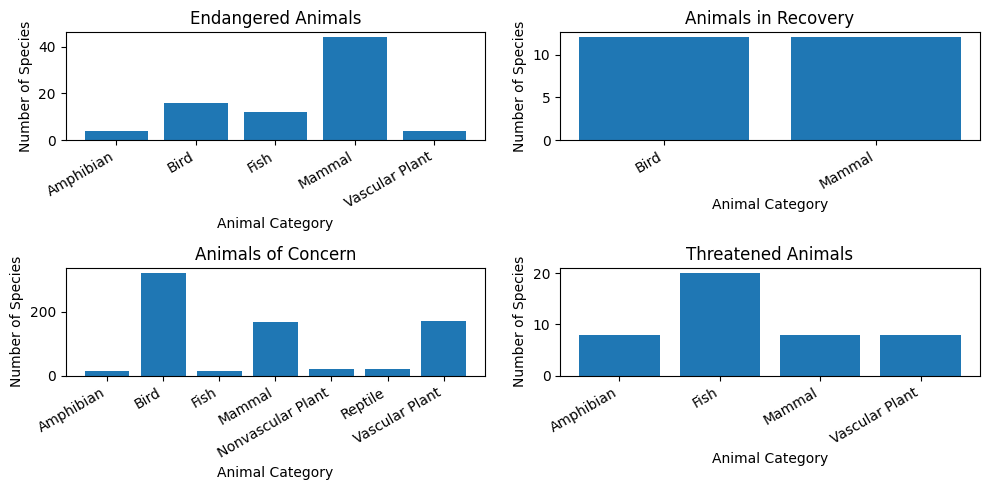

In [126]:
endangered_counts = conservation_status_counts[conservation_status_counts["conservation_status"] == "Endangered"]
recovery_counts = conservation_status_counts[conservation_status_counts["conservation_status"] == "In Recovery"]
concern_counts = conservation_status_counts[conservation_status_counts["conservation_status"] == "Species of Concern"]
threatened_counts = conservation_status_counts[conservation_status_counts["conservation_status"] == "Threatened"]

plt.figure(figsize=(10, 5))
ax = plt.subplot(2, 2, 1)
plt.bar(endangered_counts["category"], endangered_counts["scientific_name"])
plt.title("Endangered Animals")
plt.setp( ax.xaxis.get_majorticklabels(), rotation=30, ha="right" )
plt.ylabel("Number of Species")
plt.xlabel("Animal Category")

ax = plt.subplot(2, 2, 2)
plt.bar(recovery_counts["category"], recovery_counts["scientific_name"])
plt.title("Animals in Recovery")
plt.setp( ax.xaxis.get_majorticklabels(), rotation=30, ha="right" )
plt.ylabel("Number of Species")
plt.xlabel("Animal Category")

ax =plt.subplot(2, 2, 3)
plt.bar(concern_counts["category"], concern_counts["scientific_name"])
plt.title("Animals of Concern")
plt.ylabel("Number of Species")
plt.xlabel("Animal Category")
plt.setp( ax.xaxis.get_majorticklabels(), rotation=30, ha="right" )
plt.xticks(rotation=30)

ax = plt.subplot(2, 2, 4)
plt.bar(threatened_counts["category"], threatened_counts["scientific_name"])
plt.title("Threatened Animals")
plt.setp( ax.xaxis.get_majorticklabels(), rotation=30, ha="right" )
plt.ylabel("Number of Species")
plt.xlabel("Animal Category")

plt.tight_layout()
plt.show()

## Are certain types of species more likely to be endangered?
To answer this question, we are going to find the percentage of the animals in each category type that are endangered in any way (not labeled as not a species of concern)

In [156]:
category_conservation_status_counts = merged.groupby(["category", "conservation_status"]).scientific_name.count().reset_index()
category_conservation_status_counts = category_conservation_status_counts[category_conservation_status_counts.category != "Vascular Plant"]
category_conservation_status_counts = category_conservation_status_counts[category_conservation_status_counts.category != "Nonvascular Plant"]
category_conservation_status_counts

,category,conservation_status,scientific_name
0,Amphibian,Endangered,4
1,Amphibian,Not a Species of Concern,300
2,Amphibian,Species of Concern,16
3,Amphibian,Threatened,8
4,Bird,Endangered,16
5,Bird,In Recovery,12
6,Bird,Not a Species of Concern,2016
7,Bird,Species of Concern,320
8,Fish,Endangered,12
9,Fish,Not a Species of Concern,476


<Axes: xlabel='scientific_name', ylabel='category'>

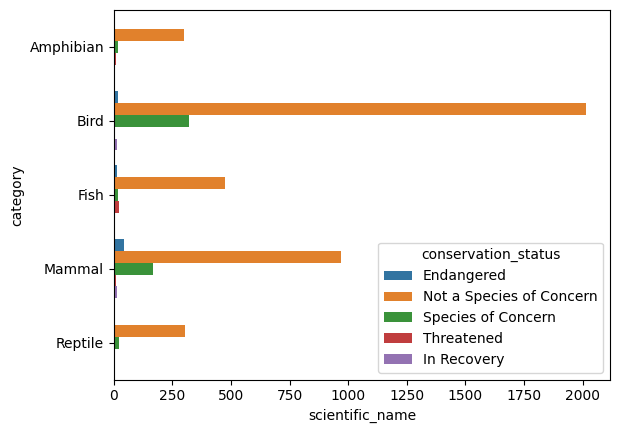

In [157]:
hue_order = ["Endangered", "Not a Species of Concern", "Species of Concern", "Threatened", "In Recovery"]

# Create the stacked horizontal bar chart
sns.barplot(x="scientific_name", y="category", hue="conservation_status", hue_order=hue_order, data=category_conservation_status_counts, orient="h")
